In [7]:
%matplotlib inline
import csv
from datetime import datetime
from urlparse import urlparse
import json
import snap

In [8]:

def extractDomain(rawURL):
	parsedUrl = urlparse(rawURL)
	return '{uri.scheme}://{uri.netloc}/'.format(uri=parsedUrl)

def isUninteresting(url):
	if 'facebook' in url:
		return True
	elif 'instagram' in url:
		return True
	elif 'twitter' in url:
		return True
	elif 'google' in url:
		return True
	elif 'youtube' in url:
		return True
	elif url == 'https://t.co/':
		return True
	else:
		return False

In [9]:
currIDs = {}
domainToNodeID = {}
years = {}
months = {}
months_graph = {}

progress = 0

for i in [1, 2, 3, 5]: 
    with open("web-2016-09-links-clean-{}.txt".format(i)) as tsvfile:
        linkReader = csv.reader(tsvfile, delimiter='\t')
        for row in linkReader:
            if row[1][:4] == "2016": 
                month = row[1][5:7] 
                if month not in months_graph: 
                    months_graph[month] = snap.TNGraph.New()
                    domainToNodeID[month] = {}
                    currIDs[month] = 0
                curr_graph = months_graph[month]

                fromDomain = extractDomain(row[0])
                if isUninteresting(fromDomain):
                    continue
                if fromDomain not in domainToNodeID[month]:
                    domainToNodeID[month][fromDomain] = currIDs[month]
                    curr_graph.AddNode(currIDs[month])
                    currIDs[month] += 1

                uniqueToDomains = set()

                for link in row[2:]:
                    try:
                        toDomain = extractDomain(link)
                        if isUninteresting(toDomain):
                            continue
                        if toDomain not in domainToNodeID[month]:
                            domainToNodeID[month][toDomain] = currIDs[month]
                            curr_graph.AddNode(currIDs[month])
                            currIDs[month] += 1
                        if toDomain not in uniqueToDomains:
                            curr_graph.AddEdge(domainToNodeID[month][fromDomain],domainToNodeID[month][toDomain])
                            uniqueToDomains.add(toDomain)
                    except ValueError:
                        pass

In [11]:
clustering_coefficients = {}
for month, graph in months_graph.iteritems(): 
    cf = snap.GetClustCf(graph)
    clustering_coefficients[month] = cf


In [12]:
clustering_coefficients

{'01': 0.0015228322702841388,
 '02': 0.0033974520853303604,
 '03': 0.0030751717624627325,
 '04': 0.003195216181983668,
 '05': 0.00560904175443839,
 '06': 0.006948611049265535,
 '07': 0.004054532165213228,
 '08': 0.007661128172344247,
 '09': 0.020660106427558684,
 '10': 0.02866986193191952}

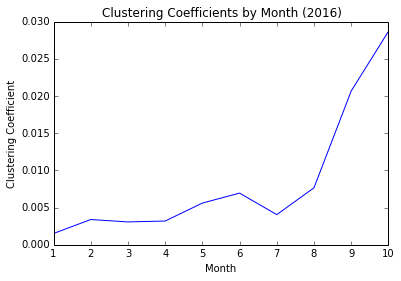

In [14]:
import matplotlib.pylab as plt

lists = sorted(clustering_coefficients.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
x = [int(month) for month in x]

plt.xlabel('Month')
plt.ylabel('Clustering Coefficient')
plt.title('Clustering Coefficients by Month (2016)')

plt.plot(x, y)

In [15]:
diameters = {}
for month, graph in months_graph.iteritems(): 
    diam = snap.GetBfsFullDiam(graph, 100, False)
    diameters[month] = diam

In [17]:
diameters

{'01': 13,
 '02': 11,
 '03': 13,
 '04': 13,
 '05': 12,
 '06': 13,
 '07': 10,
 '08': 14,
 '09': 15,
 '10': 13}

In [18]:
lists

[('01', 13),
 ('02', 11),
 ('03', 13),
 ('04', 13),
 ('05', 12),
 ('06', 13),
 ('07', 10),
 ('08', 14),
 ('09', 15),
 ('10', 13)]

In [20]:
print x
print y

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
(13, 11, 13, 13, 12, 13, 10, 14, 15, 13)


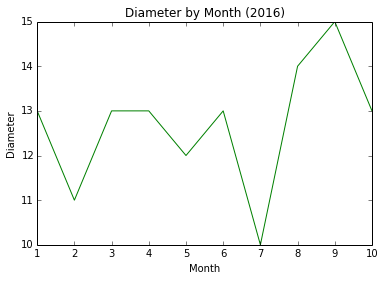

In [21]:
import matplotlib.pyplot as plt


lists = sorted(diameters.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
x = [int(month) for month in x]

month_keys = [int(month) for month in x]
plt.xlabel('Month')
plt.ylabel('Diameter')
plt.title('Diameter by Month (2016)')
plt.plot(month_keys, y, color='g')

